In [112]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [113]:
#Import Liabraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import warnings
warnings.filterwarnings('ignore')

# **Load the dataset**

In [114]:

df = pd.read_csv(".\drug200.csv")

#df = pd.read_csv("/kaggle/input/drugs-a-b-c-x-y-for-decision-trees/drug200.csv")

df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,drugY


# **Data Preprocessing**

In [115]:
#Check null values
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [116]:
#Check duplicates
df[df.duplicated()]

,Age,Sex,BP,Cholesterol,Na_to_K,Drug


In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [118]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [119]:
df.shape

(200, 6)

In [120]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

Sex
M    104
F     96
Name: count, dtype: int64


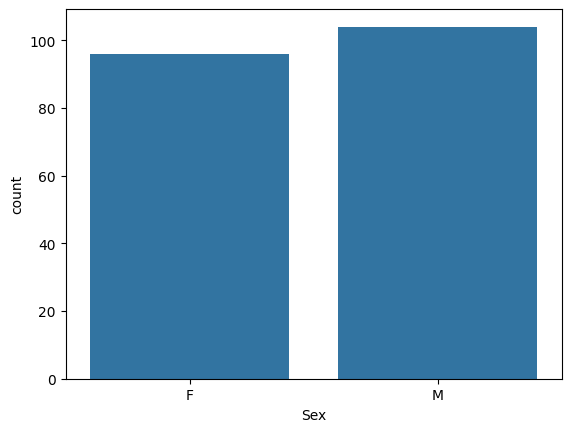

In [121]:
x = df['Sex'].value_counts()
print(x)
p = sns.countplot(x = df['Sex'])
plt.show()

Drug
drugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64


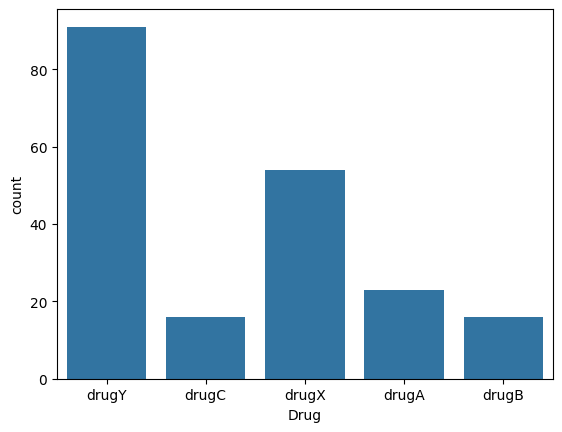

In [122]:
x = df['Drug'].value_counts()
print(x)
p = sns.countplot(df, x = 'Drug' )
plt.show()

In [123]:
df['Drug'].unique()

array(['drugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

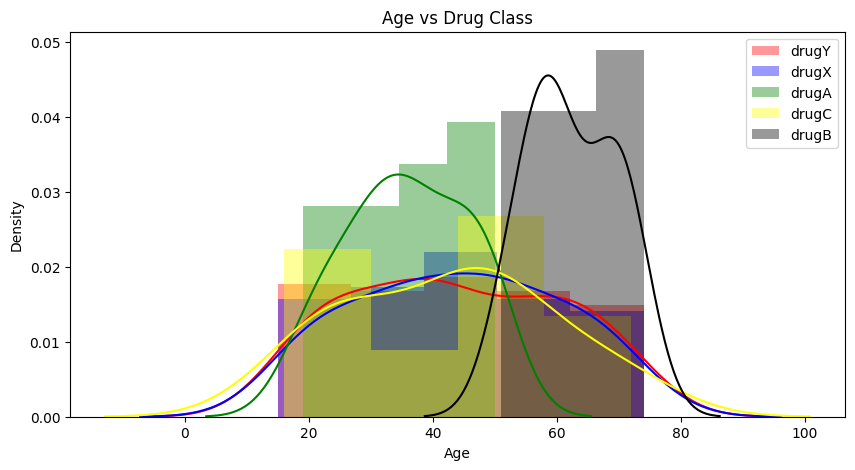

In [124]:
#Create graph
plt.figure(figsize=(10,5))
sns.distplot(df[df['Drug']=='drugY']['Age'],color = 'red',label = 'drugY')
sns.distplot(df[df['Drug']=='drugX']['Age'],color = 'blue',label = 'drugX')
sns.distplot(df[df['Drug']=='drugA']['Age'],color = 'green',label = 'drugA')
sns.distplot(df[df['Drug']=='drugC']['Age'],color = 'yellow',label = 'drugC')
sns.distplot(df[df['Drug']=='drugB']['Age'],color = 'black',label = 'drugB')
plt.legend()
plt.title('Age vs Drug Class')
plt.show()

In [125]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
df[['BP','Sex','Cholesterol','Drug']] = oe.fit_transform(df[['BP','Sex','Cholesterol','Drug']])

In [126]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0.0,0.0,0.0,25.355,4.0
1,47,1.0,1.0,0.0,13.093,2.0
2,47,1.0,1.0,0.0,10.114,2.0
3,28,0.0,2.0,0.0,7.798,3.0
4,61,0.0,1.0,0.0,18.043,4.0
...,...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567,2.0
196,16,1.0,1.0,0.0,12.006,2.0
197,52,1.0,2.0,0.0,9.894,3.0
198,23,1.0,2.0,1.0,14.020,3.0


In [127]:
x = df.iloc[:,0:-1]
y = df.iloc[:,-1]

In [128]:
x

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0.0,0.0,0.0,25.355
1,47,1.0,1.0,0.0,13.093
2,47,1.0,1.0,0.0,10.114
3,28,0.0,2.0,0.0,7.798
4,61,0.0,1.0,0.0,18.043
...,...,...,...,...,...
195,56,0.0,1.0,0.0,11.567
196,16,1.0,1.0,0.0,12.006
197,52,1.0,2.0,0.0,9.894
198,23,1.0,2.0,1.0,14.020


In [129]:
y

0      4.0
1      2.0
2      2.0
3      3.0
4      4.0
      ... 
195    2.0
196    2.0
197    3.0
198    3.0
199    3.0
Name: Drug, Length: 200, dtype: float64

# **train test split**

In [130]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.20)

In [131]:
X_train

,Age,Sex,BP,Cholesterol,Na_to_K
89,50,0.0,2.0,1.0,17.211
138,51,1.0,0.0,1.0,11.343
60,38,0.0,1.0,1.0,29.875
52,62,1.0,1.0,1.0,27.183
48,23,1.0,2.0,0.0,31.686
...,...,...,...,...,...
166,58,0.0,1.0,0.0,26.645
0,23,0.0,0.0,0.0,25.355
181,59,0.0,2.0,0.0,13.884
115,51,1.0,0.0,0.0,18.295


In [132]:
y_train

89     4.0
138    1.0
60     4.0
52     4.0
48     4.0
      ... 
166    4.0
0      4.0
181    3.0
115    4.0
46     0.0
Name: Drug, Length: 160, dtype: float64

# **Decision Tree**

- **Entropy**

In [133]:
clf_entropy = DecisionTreeClassifier(criterion = 'entropy',random_state = 100,max_depth = 3)
clf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=100)

In [134]:
y_pred_entropy = clf_entropy.predict(X_test)

In [135]:
print('Accuracy Score(Entropy) :' ,accuracy_score(y_test,y_pred_entropy))

Accuracy Score(Entropy) : 0.875


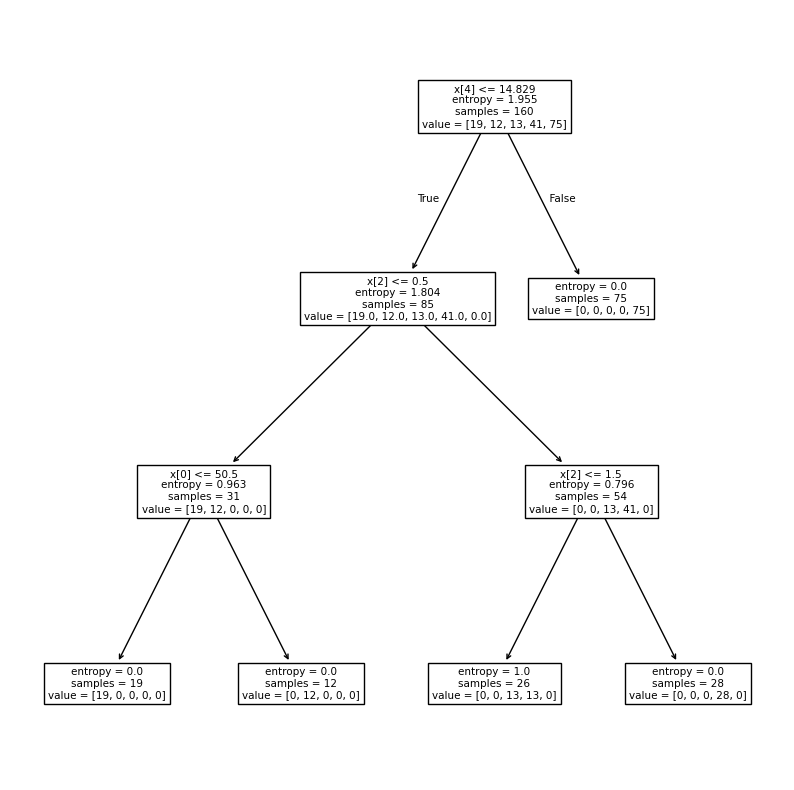

In [ ]:
class_labels = ["DrugA", "DrugB", "DrugC", "DrugX", "DrugY"]  # Replace with actual labelsp
plt.figure(figsize=(10,10))
tree.plot_tree(clf_entropy.fit(X_train,y_train), class_names=class_labels)
plt.show()

- **Confusion Matrix**

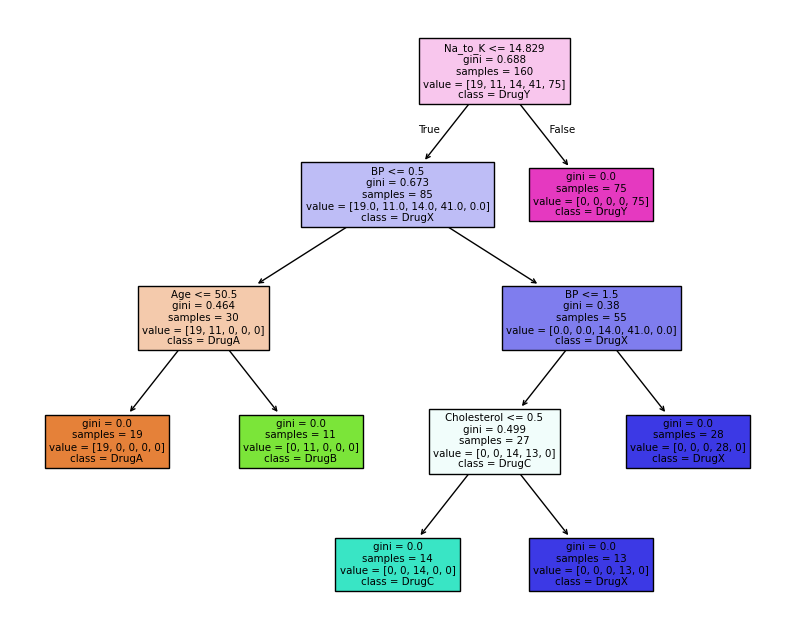

In [139]:
class_labels = ["DrugA", "DrugB", "DrugC", "DrugX", "DrugY"]  # Replace with actual labels
plt.figure(figsize=(10, 8))
plot_tree(dt, feature_names=x.columns, class_names=class_labels, filled=True)
plt.show()